## Smart Irrigation By Mihir 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder



In [20]:
irri = pd.read_csv(r"C:\Users\manas\OneDrive\Desktop\CTTC\Soil Moisture, Air temperature, humidity, and Motor onoff Monitoring data.CSV")
irri

Soil Moisture  Temperature  Air Humidity  Pump Data
0        683.802906    29.184908     71.789699          0
1        408.571567    33.707205     77.977391          1
2        659.092074    24.760311     60.776282          1
3        842.929764    32.738515     59.323543          0
4        414.199320    25.692744     66.624914          1
...             ...          ...           ...        ...
2995     355.566758    22.070900     71.290541          1
2996     443.521135    36.829497     51.394630          1
2997     935.440437    18.956660     77.663509          0
2998     850.602693    22.342141     46.442113          0
2999     752.875788    31.893127     40.656068          0

[3000 rows x 4 columns]

In [21]:
irri.isnull().sum()

Soil Moisture    0
Temperature      0
Air Humidity     0
Pump Data        0
dtype: int64

In [22]:
irri.columns

Index(['Soil Moisture', 'Temperature', 'Air Humidity', 'Pump Data'], dtype='object')

In [23]:
irri.describe()

Soil Moisture  Temperature  Air Humidity    Pump Data
count    3000.000000  3000.000000   3000.000000  3000.000000
mean      662.419754    28.443043     59.387209     0.523000
std       187.936297     6.018565     12.428161     0.499554
min       314.511016    18.002132     38.000201     0.000000
25%       501.362575    23.320750     48.661993     0.000000
50%       666.578554    28.361854     58.975423     1.000000
75%       821.867423    33.595989     70.138397     1.000000
max       984.828010    38.992770     81.267407     1.000000

In [24]:
irri.count()

Soil Moisture    3000
Temperature      3000
Air Humidity     3000
Pump Data        3000
dtype: int64

In [25]:
irri.describe()

Soil Moisture  Temperature  Air Humidity    Pump Data
count    3000.000000  3000.000000   3000.000000  3000.000000
mean      662.419754    28.443043     59.387209     0.523000
std       187.936297     6.018565     12.428161     0.499554
min       314.511016    18.002132     38.000201     0.000000
25%       501.362575    23.320750     48.661993     0.000000
50%       666.578554    28.361854     58.975423     1.000000
75%       821.867423    33.595989     70.138397     1.000000
max       984.828010    38.992770     81.267407     1.000000

In [26]:
irri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Soil Moisture  3000 non-null   float64
 1   Temperature    3000 non-null   float64
 2   Air Humidity   3000 non-null   float64
 3   Pump Data      3000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 93.9 KB


In [28]:
irri["Pump Data"].value_counts()

Pump Data
1    1569
0    1431
Name: count, dtype: int64

### Data Vizualization 

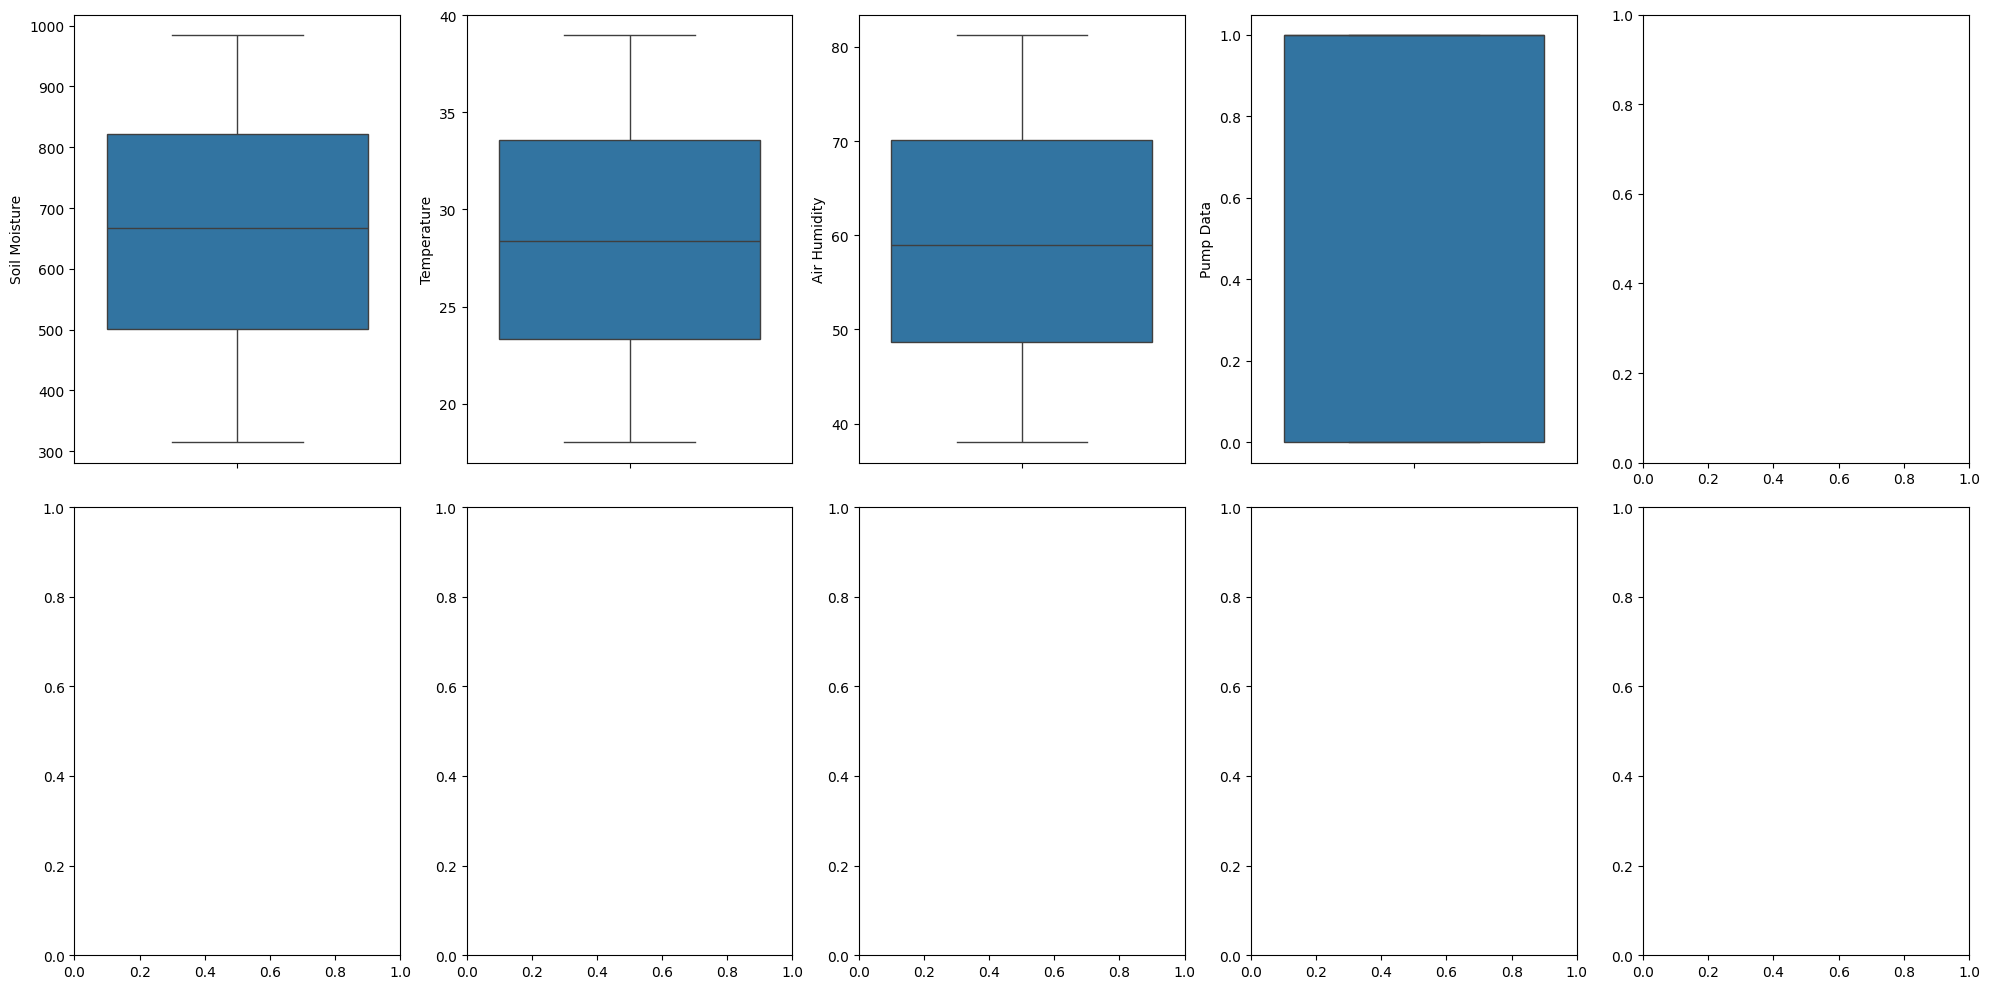

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
ax = ax.flatten()        # ✅ flatten axes to 1D array
index = 0                # ✅ initialize index

for col in irri.columns:   # iterate over dataset columns
    sns.boxplot(y=col, data=irri, ax=ax[index])
    index += 1

plt.tight_layout()
plt.show()


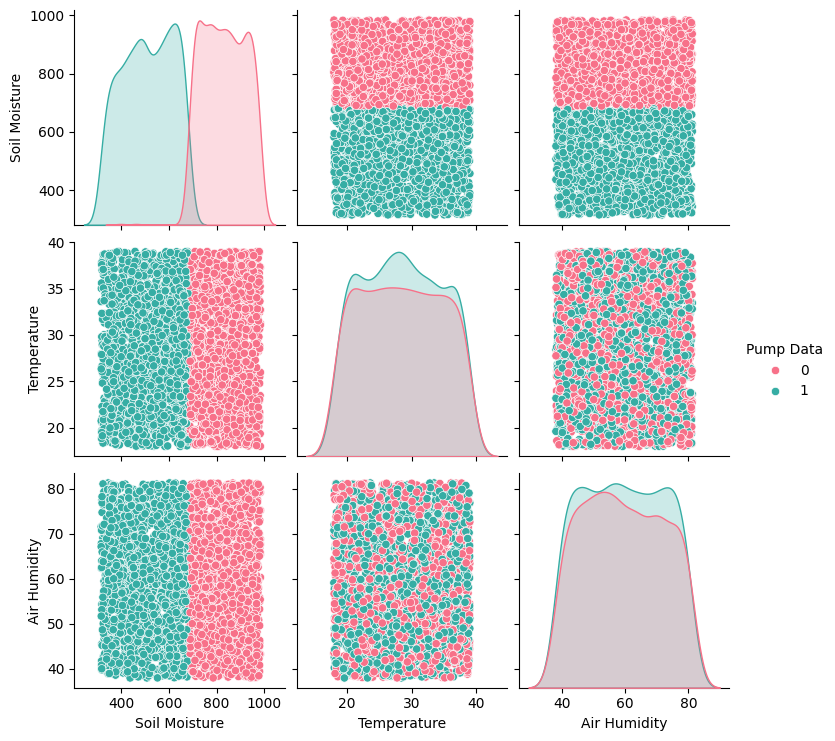

In [52]:
sns.pairplot(irri,hue="Pump Data",palette="husl")


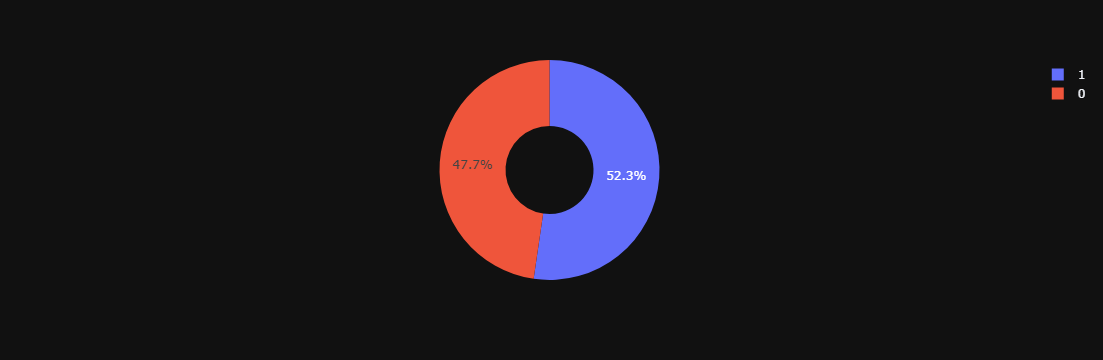

In [18]:
import plotly.express as px 
fig = px.pie(irri,names="Pump Data" , hole=0.4,template = "plotly_dark")
fig

In [46]:
irri

Soil Moisture  Temperature  Air Humidity  Pump Data
0        683.802906    29.184908     71.789699          0
1        408.571567    33.707205     77.977391          1
2        659.092074    24.760311     60.776282          1
3        842.929764    32.738515     59.323543          0
4        414.199320    25.692744     66.624914          1
...             ...          ...           ...        ...
2995     355.566758    22.070900     71.290541          1
2996     443.521135    36.829497     51.394630          1
2997     935.440437    18.956660     77.663509          0
2998     850.602693    22.342141     46.442113          0
2999     752.875788    31.893127     40.656068          0

[3000 rows x 4 columns]

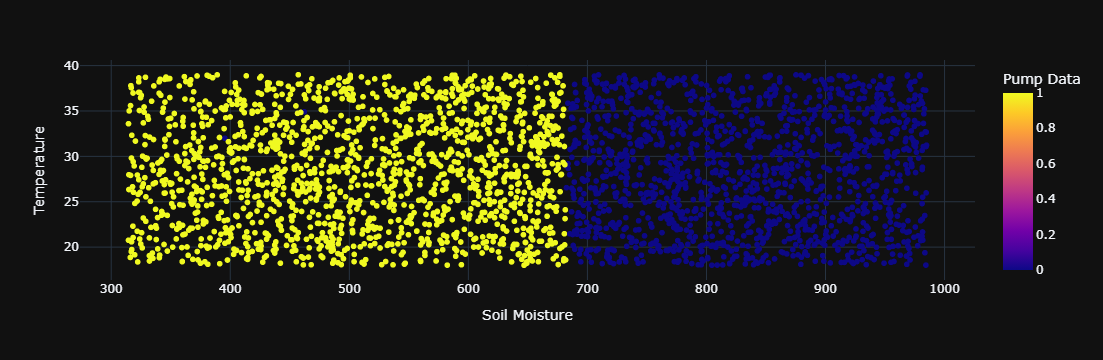

In [50]:
fig = px.scatter(irri,x="Soil Moisture",y="Temperature",template= "plotly_dark",color="Pump Data")
fig.show()

<Axes: >

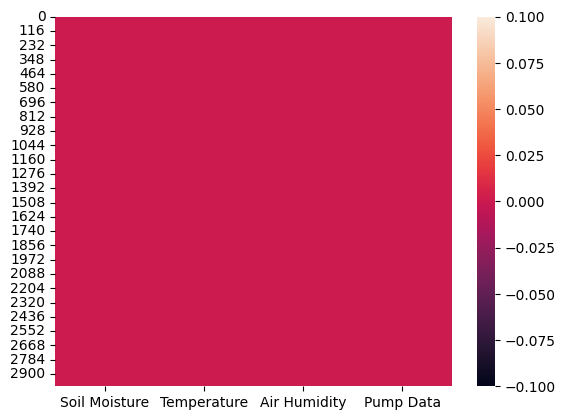

In [53]:
sns.heatmap(irri.isnull())

<Axes: >

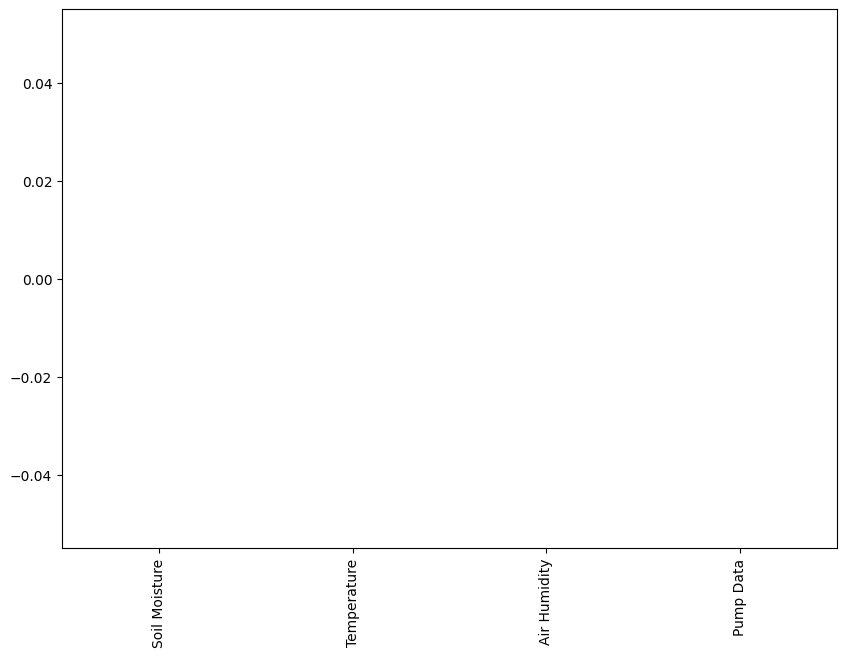

In [56]:
irri.isnull().mean().plot.bar(figsize=(10,7))

## Data Preparing for Creating & Testing Model 

In [57]:
irri

Soil Moisture  Temperature  Air Humidity  Pump Data
0        683.802906    29.184908     71.789699          0
1        408.571567    33.707205     77.977391          1
2        659.092074    24.760311     60.776282          1
3        842.929764    32.738515     59.323543          0
4        414.199320    25.692744     66.624914          1
...             ...          ...           ...        ...
2995     355.566758    22.070900     71.290541          1
2996     443.521135    36.829497     51.394630          1
2997     935.440437    18.956660     77.663509          0
2998     850.602693    22.342141     46.442113          0
2999     752.875788    31.893127     40.656068          0

[3000 rows x 4 columns]

In [59]:
x = irri.drop("Pump Data",axis=1)
y = irri["Pump Data"]

In [60]:
x

Soil Moisture  Temperature  Air Humidity
0        683.802906    29.184908     71.789699
1        408.571567    33.707205     77.977391
2        659.092074    24.760311     60.776282
3        842.929764    32.738515     59.323543
4        414.199320    25.692744     66.624914
...             ...          ...           ...
2995     355.566758    22.070900     71.290541
2996     443.521135    36.829497     51.394630
2997     935.440437    18.956660     77.663509
2998     850.602693    22.342141     46.442113
2999     752.875788    31.893127     40.656068

[3000 rows x 3 columns]

In [61]:
y

0       0
1       1
2       1
3       0
4       1
       ..
2995    1
2996    1
2997    0
2998    0
2999    0
Name: Pump Data, Length: 3000, dtype: int64

In [64]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[ 0.11379769,  0.12328326,  0.99810085],
       [-1.35093917,  0.87479975,  1.4960605 ],
       [-0.01770938, -0.61199741,  0.11178681],
       ...,
       [ 1.45297211, -1.57644974,  1.4708006 ],
       [ 1.00147929, -1.01384957, -1.04176753],
       [ 0.48139245,  0.57333592, -1.50740434]])

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state=20)

In [75]:
y_train

826     0
66      1
368     0
1659    1
109     0
       ..
1428    1
2441    0
2972    0
271     1
2522    0
Name: Pump Data, Length: 2400, dtype: int64

In [76]:
x_train

array([[ 1.61603273,  1.01593825, -1.10554087],
       [-1.61108962, -1.66544138, -0.83515603],
       [ 1.5851983 ,  0.34665034,  1.65104131],
       ...,
       [ 0.55962854, -0.81634462,  0.0447722 ],
       [-0.54433301,  0.17736141,  1.63924834],
       [ 1.47463584,  0.73816099, -0.14820499]])

## Model Building 

Logistic Regression 

In [77]:
model_lr = LogisticRegression() 

In [79]:
model_lr.fit(x_train,y_train)

LogisticRegression()

In [80]:
# Now I will make the Prediction System 
pred_lr = model_lr.predict(x_test)

In [81]:
pred_lr

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,

In [83]:
accuracy_score_lr = accuracy_score(y_test,pred_lr)
accuracy_score_lr*100

99.33333333333333

In [88]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()

In [89]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [91]:
pred_dt = model_dt.predict(x_test)
pred_dt

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,

In [93]:
accuracy_score_dt = accuracy_score(y_test,pred_dt)
accuracy_score_dt*100

99.83333333333333

## Random Forest Classifier 

In [122]:
model_rand = RandomForestClassifier()

In [123]:
model_rand.fit(x_train,y_train)

RandomForestClassifier()

In [124]:
pred_rand = model_rand.predict(x_test)

In [125]:
accuracy_score_rand = accuracy_score(y_test,pred_dt)
accuracy_score_rand*100

99.83333333333333

In [99]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()

In [100]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [106]:
for i in range(1,50):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train,y_train)
    pred_knn = model_knn.predict(x_test)
    accuracy_knn = accuracy_score(y_test,pred_knn)
    print(i,accuracy_knn)
    

1 0.9716666666666667
2 0.965
3 0.9716666666666667
4 0.9716666666666667
5 0.9733333333333334
6 0.97
7 0.9766666666666667
8 0.9716666666666667
9 0.9733333333333334
10 0.9766666666666667
11 0.975
12 0.975
13 0.9733333333333334
14 0.9766666666666667
15 0.975
16 0.9766666666666667
17 0.9783333333333334
18 0.9783333333333334
19 0.975
20 0.9783333333333334
21 0.9816666666666667
22 0.98
23 0.985
24 0.9783333333333334
25 0.9783333333333334
26 0.9783333333333334
27 0.9833333333333333
28 0.98
29 0.985
30 0.9783333333333334
31 0.985
32 0.9816666666666667
33 0.9833333333333333
34 0.98
35 0.9833333333333333
36 0.9816666666666667
37 0.9816666666666667
38 0.9816666666666667
39 0.9816666666666667
40 0.9816666666666667
41 0.9816666666666667
42 0.9816666666666667
43 0.9816666666666667
44 0.9783333333333334
45 0.9816666666666667
46 0.98
47 0.9816666666666667
48 0.9816666666666667
49 0.9833333333333333


In [108]:
    model_knn = KNeighborsClassifier(n_neighbors=29)
    model_knn.fit(x_train,y_train)
    pred_knn = model_knn.predict(x_test)
    accuracy_knn = accuracy_score(y_test,pred_knn)
    print(i,accuracy_knn)
    

49 0.985


## Support Vector Machine(SVM)

In [109]:
from sklearn.svm import SVC

In [110]:
model_svm = SVC()

In [111]:
model_svm.fit(x_train,y_train)

SVC()

In [114]:
pred_svm = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test,pred_svm)
accuracy_svm*100

98.66666666666667

In [115]:
model_xg = XGBClassifier()

In [116]:
model_xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [120]:
pred_xg = model_xg.predict(x_test)
accuracy_xg = accuracy_score(y_test,pred_xg)
accuracy_xg*100

99.33333333333333

In [128]:
model = pd.DataFrame({
    "Models":["Logistic Regression",
             "Decsion Tree Classifer",
             "Random Forest",
             "KNN",
             "Support Vector Machine",
             "XGB"],
    "Accuracy_score":[accuracy_score_lr*100,accuracy_score_dt*100,accuracy_score_rand*100,accuracy_knn*100,accuracy_svm*100,accuracy_xg*100]
})
model

Models  Accuracy_score
0     Logistic Regression       99.333333
1  Decsion Tree Classifer       99.833333
2           Random Forest       99.833333
3                     KNN       98.500000
4  Support Vector Machine       98.666667
5                     XGB       99.333333

Models  Accuracy_score
1  Decsion Tree Classifer       99.833333
2           Random Forest       99.833333
0     Logistic Regression       99.333333
5                     XGB       99.333333
4  Support Vector Machine       98.666667
3                     KNN       98.500000

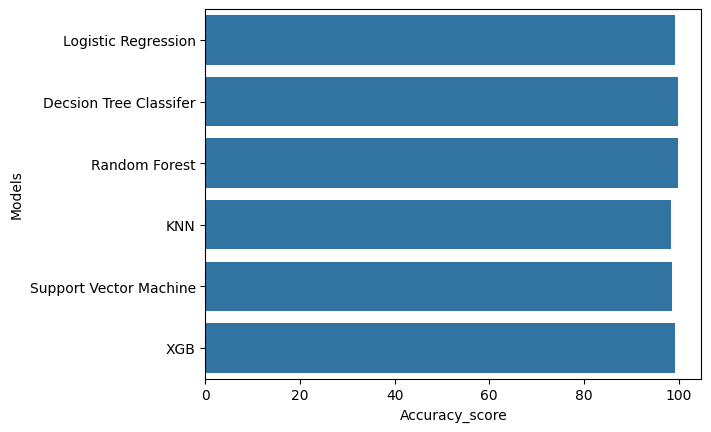

In [131]:
sns.barplot(x="Accuracy_score",y="Models",data=model)
model.sort_values(by="Accuracy_score",ascending=False)

C:\Users\manas\AppData\Local\Temp\ipykernel_21332\694873223.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




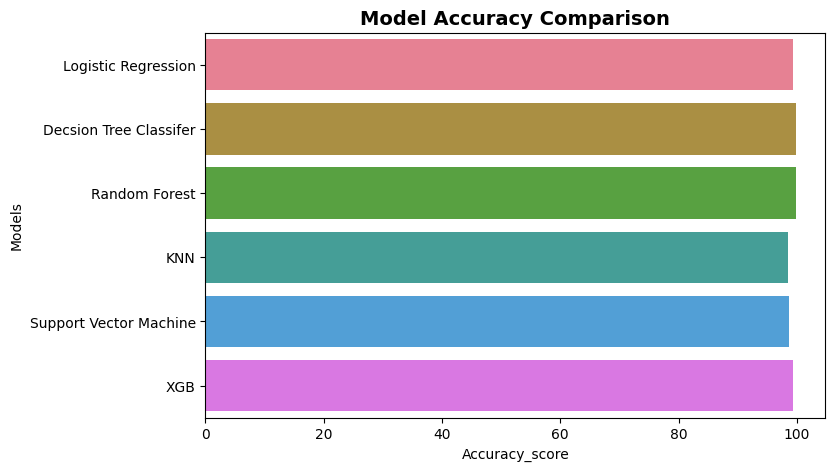

In [133]:
colors = sns.color_palette("husl", len(model))  # unique colors for each bar

plt.figure(figsize=(8,5))
sns.barplot(x="Accuracy_score", y="Models", data=model, palette=colors)
plt.title("Model Accuracy Comparison", fontsize=14, weight="bold")
plt.show()